In [36]:
import pandas as pd
import os


In [37]:
# CSV file 
csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels.csv"

df = pd.read_csv(csv_path)

print("Loaded CSV with rows:", len(df))
df.head()


Loaded CSV with rows: 84


,filename,label
0,IMG_20220411_106246.jpg,1
1,IMG_20220411_106256.jpg,0
2,IMG_20220411_106258.jpg,0
3,IMG_20220411_09235385.jpg,0
4,IMG_20220411_09235389.jpg,0


In [38]:

image_dir = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset"


df['exists'] = df['filename'].apply(lambda x: os.path.exists(os.path.join(image_dir, x)))


print("Matched image files:", df['exists'].sum(), "/", len(df))


df = df[df['exists']].copy()
df = df[['filename', 'label']]
df.head()


Matched image files: 84 / 84


,filename,label
0,IMG_20220411_106246.jpg,1
1,IMG_20220411_106256.jpg,0
2,IMG_20220411_106258.jpg,0
3,IMG_20220411_09235385.jpg,0
4,IMG_20220411_09235389.jpg,0


In [39]:
final_csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\final_verified_labels.csv"
df.to_csv(final_csv_path, index=False)
print("Final verified labels saved at:", final_csv_path)


Final verified labels saved at: C:\Users\ajith\OneDrive\Desktop\Dissertation\final_verified_labels.csv


In [40]:
print(f" TASK 1 COMPLETE: {len(df)} image-label pairs are verified and ready.")
df.sample(5)


 TASK 1 COMPLETE: 84 image-label pairs are verified and ready.


,filename,label
37,IMG_20220426_09237081.jpg,0
6,IMG_20220413_09235598.jpg,0
14,IMG_20220414_09235802.jpg,0
22,IMG_20220421_09236480.jpg,0
69,IMG_20220615_09246267.jpg,1


In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [42]:
import pandas as pd

csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\final_verified_labels.csv"
image_dir = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset"

df = pd.read_csv(csv_path)

print(f"Total samples: {len(df)}")
df.head()


Total samples: 84


,filename,label
0,IMG_20220411_106246.jpg,1
1,IMG_20220411_106256.jpg,0
2,IMG_20220411_106258.jpg,0
3,IMG_20220411_09235385.jpg,0
4,IMG_20220411_09235389.jpg,0


In [43]:
import pandas as pd

csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels.csv"
df = pd.read_csv(csv_path)

print(df.head())                    # View top rows
print(df['label'].unique())         # Check unique label values
print(df['label'].value_counts())   # Count how many of each class


                    filename label
0    IMG_20220411_106246.jpg     1
1    IMG_20220411_106256.jpg     0
2    IMG_20220411_106258.jpg     0
3  IMG_20220411_09235385.jpg     0
4  IMG_20220411_09235389.jpg     0
['1' '0' 'result not found']
label
0                   66
1                   16
result not found     2
Name: count, dtype: int64


In [44]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img

# Input paths
csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels.csv"
image_dir = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset"
output_dir = os.path.join(image_dir, "augmented")
os.makedirs(output_dir, exist_ok=True)

# Load CSV and keep only COVID-positive rows
df = pd.read_csv(csv_path)
df = df[df['label'].isin(['0', '1'])]     # Remove bad rows like 'result not found'
positive_df = df[df['label'] == '1']      # Correct way to select COVID-positive rows

print(f" Found {len(positive_df)} COVID-positive images to augment.")

# Image augmentor
augmentor = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Settings
AUG_PER_IMAGE = 5
augmented_entries = []

# Process positive images only
for _, row in positive_df.iterrows():
    img_path = os.path.join(image_dir, row['filename'])
    base_name = os.path.splitext(os.path.basename(row['filename']))[0]

    if not os.path.exists(img_path):
        print(f" File not found: {img_path}")
        continue

    try:
        img = load_img(img_path)
        x = img_to_array(img).reshape((1,) + img.size + (3,))  # Ensure shape is (1, height, width, 3)

        for i, batch in enumerate(augmentor.flow(x, batch_size=1)):
            aug_filename = f"{base_name}_aug_{i}.jpg"
            aug_path = os.path.join(output_dir, aug_filename)
            save_img(aug_path, batch[0])

            # Store label 1 for each augmented file
            augmented_entries.append({'filename': os.path.join('augmented', aug_filename), 'label': 1})
            print(f"Saved augmented image: {aug_filename}")

            if i + 1 >= AUG_PER_IMAGE:
                break

    except Exception as e:
        print(f"Error processing {img_path}: {e}")

# Save new CSV with only augmented entries
augmented_df = pd.DataFrame(augmented_entries)
output_csv = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels_augmented.csv"
augmented_df.to_csv(output_csv, index=False)
print(f" Saved new CSV with only augmented positives: {output_csv}")


 Found 16 COVID-positive images to augment.
Saved augmented image: IMG_20220411_106246_aug_0.jpg
Saved augmented image: IMG_20220411_106246_aug_1.jpg
Saved augmented image: IMG_20220411_106246_aug_2.jpg
Saved augmented image: IMG_20220411_106246_aug_3.jpg
Saved augmented image: IMG_20220411_106246_aug_4.jpg
Saved augmented image: IMG_20220413_09235579_aug_0.jpg
Saved augmented image: IMG_20220413_09235579_aug_1.jpg
Saved augmented image: IMG_20220413_09235579_aug_2.jpg
Saved augmented image: IMG_20220413_09235579_aug_3.jpg
Saved augmented image: IMG_20220413_09235579_aug_4.jpg
Saved augmented image: IMG_20220413_09235624_aug_0.jpg
Saved augmented image: IMG_20220413_09235624_aug_1.jpg
Saved augmented image: IMG_20220413_09235624_aug_2.jpg
Saved augmented image: IMG_20220413_09235624_aug_3.jpg
Saved augmented image: IMG_20220413_09235624_aug_4.jpg
Saved augmented image: IMG_20220413_09235641_aug_0.jpg
Saved augmented image: IMG_20220413_09235641_aug_1.jpg
Saved augmented image: IMG_2022

In [45]:
import pandas as pd

# Load original and augmented CSVs
original_df = pd.read_csv("C:/Users/ajith/OneDrive/Desktop/Dissertation/cleaned_labels.csv")
augmented_df = pd.read_csv("C:/Users/ajith/OneDrive/Desktop/Dissertation/cleaned_labels_augmented.csv")

# Merge both dataframes
merged_df = pd.concat([original_df, augmented_df], ignore_index=True)

# Convert labels to string for safe filtering
merged_df['label'] = merged_df['label'].astype(str)

# Keep only valid labels '0' and '1'
merged_df = merged_df[merged_df['label'].isin(['0', '1'])]

# Convert back to integers
merged_df['label'] = merged_df['label'].astype(int)

# Shuffle the merged dataframe
merged_df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to disk
merged_df.to_csv("C:/Users/ajith/OneDrive/Desktop/Dissertation/merged_labels.csv", index=False)

# Print final label distribution
print("Final label distribution:")
print(merged_df['label'].value_counts())


Final label distribution:
label
1    96
0    66
Name: count, dtype: int64


MobileNetV3 Implementation

In [46]:
### 📦 Phase 1: Data Preparation and Augmentation Setup

import pandas as pd
import os
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the cleaned merged CSV
csv_path = r"C:/Users/ajith/OneDrive/Desktop/Dissertation/merged_labels.csv"
df = pd.read_csv(csv_path)

# Confirm label balance
print("Label distribution:")
print(df['label'].value_counts())

# Define base directory for images
image_dir = r"C:/Users/ajith/OneDrive/Desktop/Dissertation/dataset/content/dataset"

# Add full path to filenames for Keras generator
df['filepath'] = df['filename'].apply(lambda x: os.path.join(image_dir, x.replace('\\', '/')))



Label distribution:
label
1    96
0    66
Name: count, dtype: int64


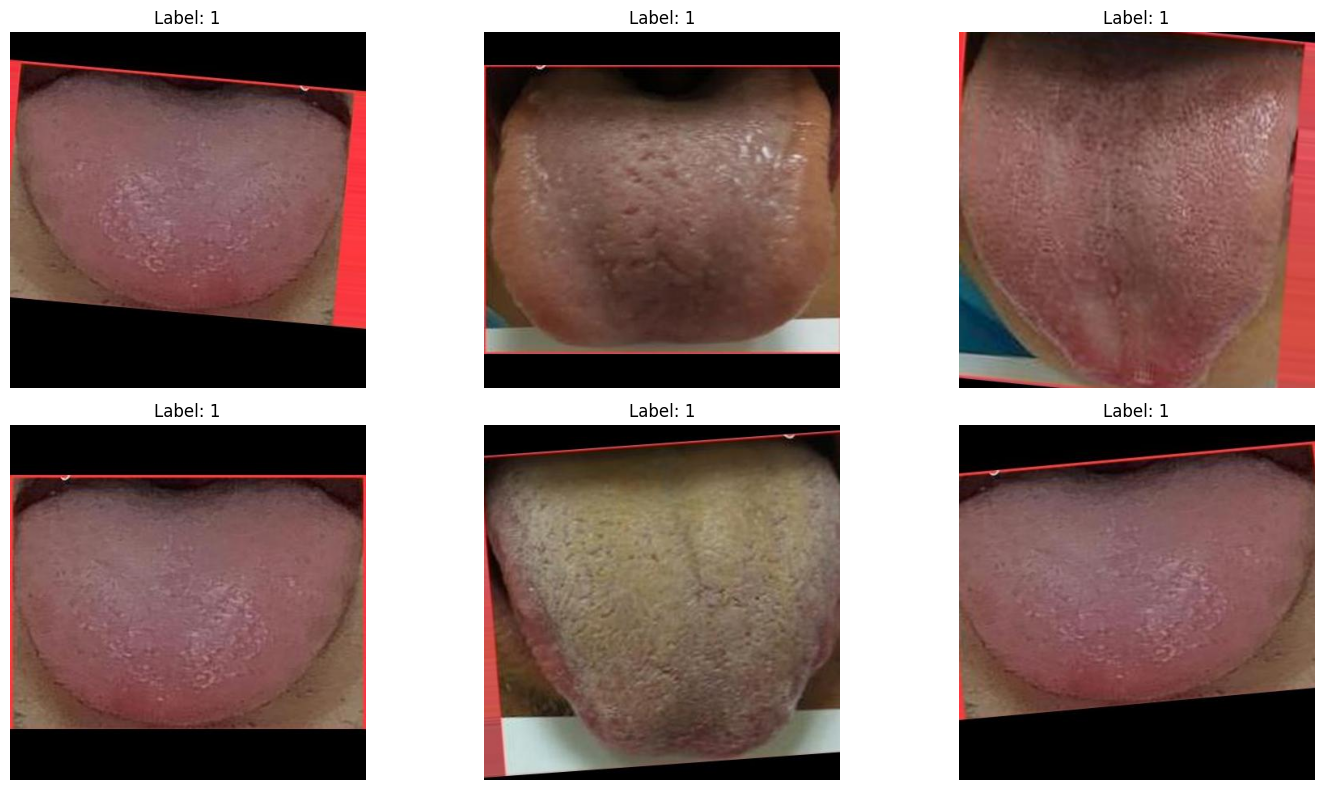

In [47]:
# Show a few sample images with their labels
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample_df = df.sample(6, random_state=42).reset_index(drop=True)

plt.figure(figsize=(15, 8))
for i in range(len(sample_df)):
    img = mpimg.imread(sample_df['filepath'][i])
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Label: {sample_df['label'][i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [48]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (classification_report, matthews_corrcoef,
                             roc_auc_score, precision_recall_curve)
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [49]:
# Define image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 50

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(df['label']),
                                     y=df['label'])
class_weights = {i: w for i, w in enumerate(class_weights)}
print("Class weights:", class_weights)

Class weights: {0: 1.2272727272727273, 1: 0.84375}


In [50]:
# Stratified K-Fold CV
X = df['filepath'].values
y = df['label'].values
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
for train_index, val_index in skf.split(X, y):
    print(f"\n Fold {fold}")

    train_paths, val_paths = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]

    # Prepare generators
    datagen = ImageDataGenerator(rescale=1./255)
    train_df = pd.DataFrame({'filename': train_paths, 'class': train_labels.astype(str)})
    val_df = pd.DataFrame({'filename': val_paths, 'class': val_labels.astype(str)})

    train_gen = datagen.flow_from_dataframe(
        train_df, x_col='filename', y_col='class', target_size=IMG_SIZE,
        batch_size=BATCH_SIZE, class_mode='binary', shuffle=True)

    val_gen = datagen.flow_from_dataframe(
        val_df, x_col='filename', y_col='class', target_size=IMG_SIZE,
        batch_size=BATCH_SIZE, class_mode='binary', shuffle=False)

    # Load and partially unfreeze MobileNetV3
    base_model = MobileNetV3Large(input_shape=(224, 224, 3),
                                  include_top=False, weights='imagenet')
    base_model.trainable = False

    # Build model
    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)

    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=[
                      tf.keras.metrics.BinaryAccuracy(),
                      tf.keras.metrics.Precision(),
                      tf.keras.metrics.Recall(),
                      tf.keras.metrics.AUC()
                  ])

    # Early stopping callback
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train
    model.fit(train_gen, validation_data=val_gen, epochs=EPOCHS,
              class_weight=class_weights, callbacks=[early_stop], verbose=1)

    # Unfreeze top 30 layers for fine-tuning
    base_model.trainable = True
    for layer in base_model.layers[:-30]:
        layer.trainable = False

    model.compile(optimizer=Adam(learning_rate=1e-5),  # Smaller LR for fine-tuning (change accordingly)
                  loss='binary_crossentropy',
                  metrics=[
                      tf.keras.metrics.BinaryAccuracy(),
                      tf.keras.metrics.Precision(),
                      tf.keras.metrics.Recall(),
                      tf.keras.metrics.AUC()
                  ])

    model.fit(train_gen, validation_data=val_gen, epochs=10,
              class_weight=class_weights, verbose=1)

    # Predictions & Threshold tuning
    val_preds = model.predict(val_gen).ravel()
    precision, recall, thresholds = precision_recall_curve(val_labels, val_preds)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_thresh = thresholds[np.argmax(f1_scores)]
    print(f"Best threshold for F1: {best_thresh:.2f}")

    val_preds_binary = (val_preds > best_thresh).astype(int)

    # Evaluation
    print("\n Classification Report:")
    print(classification_report(val_labels, val_preds_binary))
    print("MCC:", matthews_corrcoef(val_labels, val_preds_binary))
    print("AUC:", roc_auc_score(val_labels, val_preds))

    fold += 1


 Fold 1
Found 129 validated image filenames belonging to 2 classes.
Found 33 validated image filenames belonging to 2 classes.
Epoch 1/50
9/9 [==============================] - 4s 227ms/step - loss: 0.7605 - binary_accuracy: 0.4419 - precision_20: 0.5714 - recall_20: 0.2105 - auc_20: 0.5021 - val_loss: 0.7640 - val_binary_accuracy: 0.3939 - val_precision_20: 0.0000e+00 - val_recall_20: 0.0000e+00 - val_auc_20: 0.5212
Epoch 2/50
9/9 [==============================] - 1s 69ms/step - loss: 0.7183 - binary_accuracy: 0.4806 - precision_20: 0.6667 - recall_20: 0.2368 - auc_20: 0.5735 - val_loss: 0.7600 - val_binary_accuracy: 0.3939 - val_precision_20: 0.0000e+00 - val_recall_20: 0.0000e+00 - val_auc_20: 0.4712
Epoch 3/50
9/9 [==============================] - 1s 69ms/step - loss: 0.7522 - binary_accuracy: 0.4186 - precision_20: 0.5152 - recall_20: 0.2237 - auc_20: 0.4854 - val_loss: 0.7555 - val_binary_accuracy: 0.3939 - val_precision_20: 0.0000e+00 - val_recall_20: 0.0000e+00 - val_auc_20:

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os


 Fold 1
Found 129 validated image filenames belonging to 2 classes.
Found 33 validated image filenames belonging to 2 classes.
Epoch 1/20
9/9 [==============================] - 4s 175ms/step - loss: 0.6915 - binary_accuracy: 0.5426 - precision_30: 0.5842 - recall_30: 0.7763 - auc_30: 0.5555 - val_loss: 0.6777 - val_binary_accuracy: 0.6061 - val_precision_30: 0.6061 - val_recall_30: 1.0000 - val_auc_30: 0.4615
Epoch 2/20
9/9 [==============================] - 1s 92ms/step - loss: 0.6955 - binary_accuracy: 0.5504 - precision_30: 0.5918 - recall_30: 0.7632 - auc_30: 0.5485 - val_loss: 0.6792 - val_binary_accuracy: 0.6061 - val_precision_30: 0.6061 - val_recall_30: 1.0000 - val_auc_30: 0.5404
Epoch 3/20
9/9 [==============================] - 1s 92ms/step - loss: 0.7097 - binary_accuracy: 0.5039 - precision_30: 0.5789 - recall_30: 0.5789 - auc_30: 0.4768 - val_loss: 0.6800 - val_binary_accuracy: 0.6364 - val_precision_30: 0.6333 - val_recall_30: 0.9500 - val_auc_30: 0.5769
Epoch 4/20
9/9 [

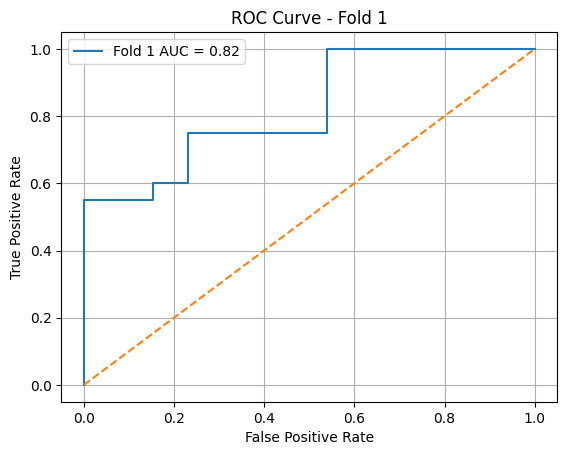


 Fold 2
Found 129 validated image filenames belonging to 2 classes.
Found 33 validated image filenames belonging to 2 classes.


c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/20
9/9 [==============================] - 5s 186ms/step - loss: 0.6919 - binary_accuracy: 0.4806 - precision_31: 0.6562 - recall_31: 0.2727 - auc_31: 0.5673 - val_loss: 0.7278 - val_binary_accuracy: 0.3939 - val_precision_31: 0.0000e+00 - val_recall_31: 0.0000e+00 - val_auc_31: 0.4117
Epoch 2/20
9/9 [==============================] - 1s 112ms/step - loss: 0.7053 - binary_accuracy: 0.4264 - precision_31: 0.5333 - recall_31: 0.3117 - auc_31: 0.4740 - val_loss: 0.7189 - val_binary_accuracy: 0.4545 - val_precision_31: 0.6667 - val_recall_31: 0.1053 - val_auc_31: 0.4305
Epoch 3/20
9/9 [==============================] - 1s 96ms/step - loss: 0.6770 - binary_accuracy: 0.5969 - precision_31: 0.7551 - recall_31: 0.4805 - auc_31: 0.6011 - val_loss: 0.7117 - val_binary_accuracy: 0.3939 - val_precision_31: 0.4615 - val_recall_31: 0.3158 - val_auc_31: 0.4850
Epoch 4/20
9/9 [==============================] - 1s 99ms/step - loss: 0.6865 - binary_accuracy: 0.5426 - precision_31: 0.6406 - recall

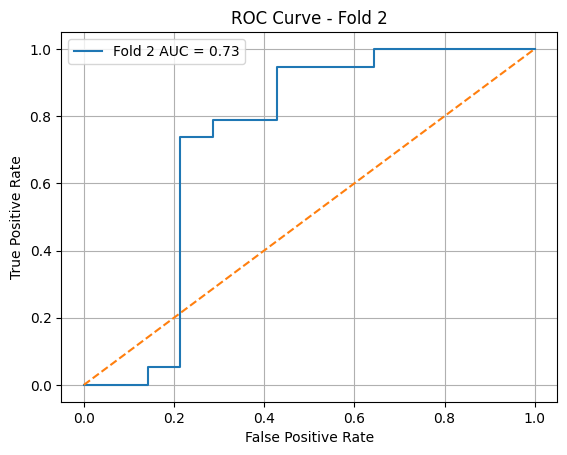


 Fold 3
Found 130 validated image filenames belonging to 2 classes.
Found 32 validated image filenames belonging to 2 classes.


c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/20
9/9 [==============================] - 4s 191ms/step - loss: 0.7046 - binary_accuracy: 0.5769 - precision_32: 0.5982 - recall_32: 0.8701 - auc_32: 0.5458 - val_loss: 0.6847 - val_binary_accuracy: 0.5938 - val_precision_32: 0.5938 - val_recall_32: 1.0000 - val_auc_32: 0.5000
Epoch 2/20
9/9 [==============================] - 1s 97ms/step - loss: 0.6861 - binary_accuracy: 0.5769 - precision_32: 0.6058 - recall_32: 0.8182 - auc_32: 0.5740 - val_loss: 0.6815 - val_binary_accuracy: 0.6562 - val_precision_32: 0.6333 - val_recall_32: 1.0000 - val_auc_32: 0.5607
Epoch 3/20
9/9 [==============================] - 1s 98ms/step - loss: 0.6810 - binary_accuracy: 0.6077 - precision_32: 0.6548 - recall_32: 0.7143 - auc_32: 0.6034 - val_loss: 0.6822 - val_binary_accuracy: 0.6562 - val_precision_32: 0.6818 - val_recall_32: 0.7895 - val_auc_32: 0.6174
Epoch 4/20
9/9 [==============================] - 1s 95ms/step - loss: 0.6919 - binary_accuracy: 0.5538 - precision_32: 0.6173 - recall_32: 0.64

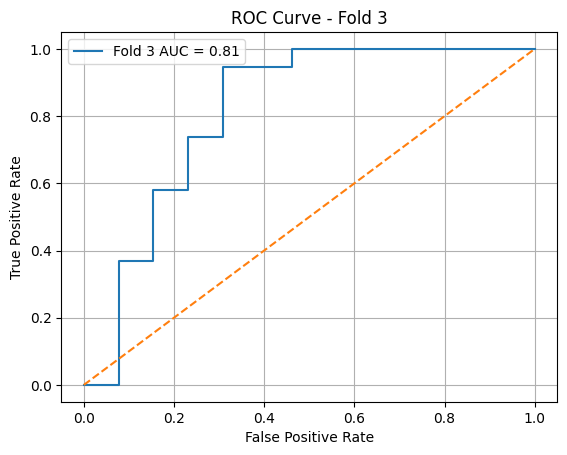


 Fold 4
Found 130 validated image filenames belonging to 2 classes.
Found 32 validated image filenames belonging to 2 classes.


c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/20
9/9 [==============================] - 4s 180ms/step - loss: 0.7147 - binary_accuracy: 0.4154 - precision_33: 0.5556 - recall_33: 0.0649 - auc_33: 0.5210 - val_loss: 0.7364 - val_binary_accuracy: 0.3750 - val_precision_33: 0.0000e+00 - val_recall_33: 0.0000e+00 - val_auc_33: 0.5850
Epoch 2/20
9/9 [==============================] - 1s 96ms/step - loss: 0.7294 - binary_accuracy: 0.3769 - precision_33: 0.3333 - recall_33: 0.0519 - auc_33: 0.4561 - val_loss: 0.7281 - val_binary_accuracy: 0.3750 - val_precision_33: 0.0000e+00 - val_recall_33: 0.0000e+00 - val_auc_33: 0.6316
Epoch 3/20
9/9 [==============================] - 1s 97ms/step - loss: 0.6878 - binary_accuracy: 0.4769 - precision_33: 0.7368 - recall_33: 0.1818 - auc_33: 0.6006 - val_loss: 0.7182 - val_binary_accuracy: 0.4062 - val_precision_33: 0.5000 - val_recall_33: 0.0526 - val_auc_33: 0.6397
Epoch 4/20
9/9 [==============================] - 1s 92ms/step - loss: 0.7069 - binary_accuracy: 0.4462 - precision_33: 0.5806 -

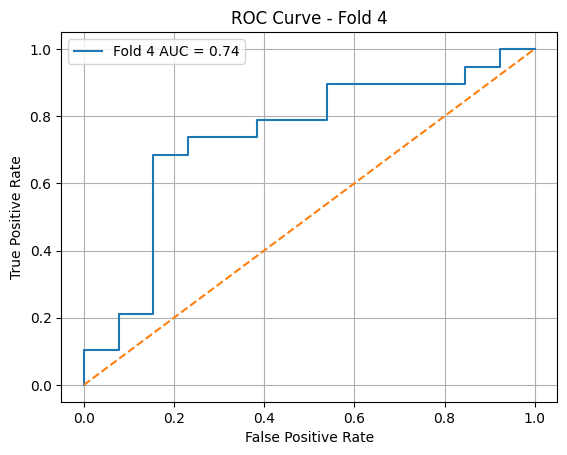


 Fold 5
Found 130 validated image filenames belonging to 2 classes.
Found 32 validated image filenames belonging to 2 classes.


c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/20
9/9 [==============================] - 4s 173ms/step - loss: 0.6685 - binary_accuracy: 0.5923 - precision_34: 0.7222 - recall_34: 0.5065 - auc_34: 0.6580 - val_loss: 0.6886 - val_binary_accuracy: 0.5625 - val_precision_34: 0.8571 - val_recall_34: 0.3158 - val_auc_34: 0.6721
Epoch 2/20
9/9 [==============================] - 1s 102ms/step - loss: 0.6960 - binary_accuracy: 0.4846 - precision_34: 0.6000 - recall_34: 0.3896 - auc_34: 0.5256 - val_loss: 0.6832 - val_binary_accuracy: 0.5625 - val_precision_34: 0.8571 - val_recall_34: 0.3158 - val_auc_34: 0.7105
Epoch 3/20
9/9 [==============================] - 1s 98ms/step - loss: 0.6815 - binary_accuracy: 0.5154 - precision_34: 0.6458 - recall_34: 0.4026 - auc_34: 0.5894 - val_loss: 0.6811 - val_binary_accuracy: 0.5625 - val_precision_34: 0.8571 - val_recall_34: 0.3158 - val_auc_34: 0.7591
Epoch 4/20
9/9 [==============================] - 1s 111ms/step - loss: 0.6794 - binary_accuracy: 0.5308 - precision_34: 0.6667 - recall_34: 0.

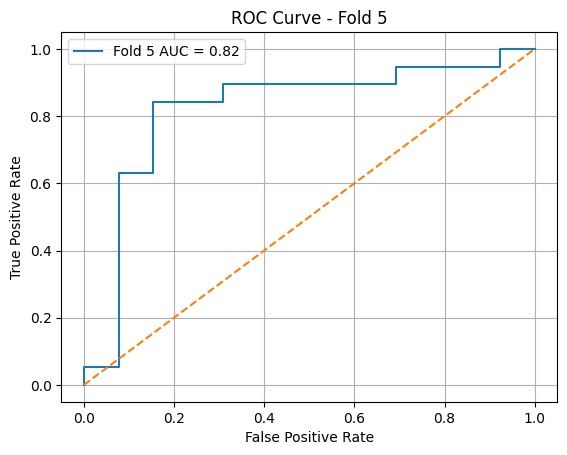


 Cross-Fold Evaluation Summary:
   fold       auc       mcc  threshold  accuracy    f1_pos  recall_pos  \
0     1  0.823077  0.491883   0.453699  0.757576  0.826087    0.950000   
1     2  0.729323  0.501322   0.466341  0.757576  0.809524    0.894737   
2     3  0.813765  0.607035   0.470019  0.812500  0.850000    0.894737   
3     4  0.736842  0.331686   0.432572  0.687500  0.761905    0.842105   
4     5  0.821862  0.625577   0.497260  0.812500  0.833333    0.789474   

   precision_pos  
0       0.730769  
1       0.739130  
2       0.809524  
3       0.695652  
4       0.882353  


c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
# Directory to save models
os.makedirs("saved_models", exist_ok=True)

# Store fold metrics
fold_metrics = []

fold = 1
for train_index, val_index in skf.split(X, y):
    print(f"\n Fold {fold}")

    train_paths, val_paths = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]

    # Data generators
    datagen = ImageDataGenerator(rescale=1./255)
    train_df = pd.DataFrame({'filename': train_paths, 'class': train_labels.astype(str)})
    val_df = pd.DataFrame({'filename': val_paths, 'class': val_labels.astype(str)})

    train_gen = datagen.flow_from_dataframe(
        train_df, x_col='filename', y_col='class', target_size=IMG_SIZE,
        batch_size=BATCH_SIZE, class_mode='binary', shuffle=True)

    val_gen = datagen.flow_from_dataframe(
        val_df, x_col='filename', y_col='class', target_size=IMG_SIZE,
        batch_size=BATCH_SIZE, class_mode='binary', shuffle=False)

    # Rebuild model
    base_model = MobileNetV3Large(input_shape=(224, 224, 3),
                                  include_top=False, weights='imagenet')
    base_model.trainable = True
    for layer in base_model.layers[:-30]:
        layer.trainable = False

    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=True)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)

    model.compile(optimizer=Adam(learning_rate=1e-5),
                  loss='binary_crossentropy',
                  metrics=[
                      tf.keras.metrics.BinaryAccuracy(),
                      tf.keras.metrics.Precision(),
                      tf.keras.metrics.Recall(),
                      tf.keras.metrics.AUC()
                  ])

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(train_gen, validation_data=val_gen, epochs=20,
              class_weight=class_weights, callbacks=[early_stop], verbose=1)

    # Predictions
    val_preds = model.predict(val_gen).ravel()
    fpr, tpr, thresholds = roc_curve(val_labels, val_preds)
    auc_score = roc_auc_score(val_labels, val_preds)

    # Save ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f"Fold {fold} AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - Fold {fold}")
    plt.legend()
    plt.grid()
    plt.show()

    # Binary predictions using best F1 threshold
    precision, recall, thresholds_f1 = precision_recall_curve(val_labels, val_preds)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_thresh = thresholds_f1[np.argmax(f1_scores)]
    val_preds_binary = (val_preds > best_thresh).astype(int)

    # Classification summary
    report = classification_report(val_labels, val_preds_binary, output_dict=True)
    mcc = matthews_corrcoef(val_labels, val_preds_binary)

    # Save model
    model.save(f"saved_models/mobilenetv3_fold{fold}.h5")

    # Log metrics
    fold_metrics.append({
        'fold': fold,
        'auc': auc_score,
        'mcc': mcc,
        'threshold': best_thresh,
        'accuracy': report['accuracy'],
        'f1_pos': report['1']['f1-score'],
        'recall_pos': report['1']['recall'],
        'precision_pos': report['1']['precision'],
    })

    fold += 1

# Show summary
summary_df = pd.DataFrame(fold_metrics)
print("\n Cross-Fold Evaluation Summary:")
print(summary_df)

# Optional: Save summary as CSV
summary_df.to_csv("mobilenetv3_fold_summary.csv", index=False)

Found 32 validated image filenames belonging to 2 classes.
Loaded model: saved_models/mobilenetv3_fold1.h5
2/2 [==============================] - 1s 59ms/step
Loaded model: saved_models/mobilenetv3_fold2.h5
2/2 [==============================] - 1s 58ms/step
Loaded model: saved_models/mobilenetv3_fold3.h5
2/2 [==============================] - 1s 60ms/step
Loaded model: saved_models/mobilenetv3_fold4.h5
2/2 [==============================] - 1s 79ms/step
Loaded model: saved_models/mobilenetv3_fold5.h5
2/2 [==============================] - 1s 62ms/step

 Ensemble Classification Report:
Accuracy 0.8125
Precision: 0.8095
Recall: 0.8947
F1-score: 0.8500
Specificity 0.6923076923076923
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.81      0.89      0.85        19

    accuracy                           0.81        32
   macro avg       0.81      0.79      0.80        32
weighted avg       0.81      0.81     

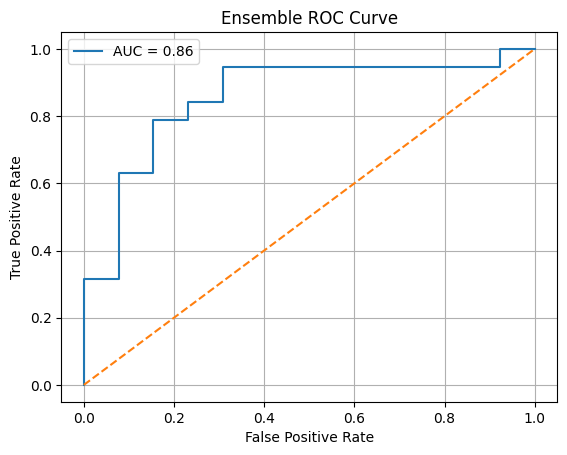

In [53]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, roc_auc_score, matthews_corrcoef, precision_recall_curve
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    confusion_matrix, accuracy_score
)

# Use last fold's validation set for ensembling
val_paths = X[val_index]
val_labels = y[val_index]

# Data generator (no shuffle)
datagen = ImageDataGenerator(rescale=1./255)
val_df = pd.DataFrame({'filename': val_paths, 'class': val_labels.astype(str)})
val_gen = datagen.flow_from_dataframe(
    val_df, x_col='filename', y_col='class', target_size=IMG_SIZE,
    batch_size=BATCH_SIZE, class_mode='binary', shuffle=False)

# Load and predict from all 5 models
ensemble_preds = []

for fold_num in range(1, 6):
    model_path = f"saved_models/mobilenetv3_fold{fold_num}.h5"
    if os.path.exists(model_path):
        print(f"Loaded model: {model_path}")
        model = load_model(model_path)
        preds = model.predict(val_gen).ravel()
        ensemble_preds.append(preds)
    else:
        print(f" Missing: {model_path}")

# Average predictions
avg_preds = np.mean(ensemble_preds, axis=0)

# Threshold tuning using F1
precision, recall, thresholds = precision_recall_curve(val_labels, avg_preds)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_thresh = thresholds[np.argmax(f1_scores)]

# Binary predictions using best threshold
avg_preds_binary = (avg_preds > best_thresh).astype(int)
precision_val = precision_score(val_labels, avg_preds_binary)
recall_val = recall_score(val_labels, avg_preds_binary)
f1_val = f1_score(val_labels, avg_preds_binary)
mcc_val = matthews_corrcoef(val_labels, avg_preds_binary)
acc_val = accuracy_score(val_labels, avg_preds_binary)

# Specificity calculation
tn, fp, fn, tp = confusion_matrix(val_labels, avg_preds_binary).ravel()
specificity = tn / (tn + fp)

# Evaluation
print("\n Ensemble Classification Report:")
print("Accuracy",acc_val)
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1-score: {f1_val:.4f}")
print(f"Specificity" , specificity)
print(classification_report(val_labels, avg_preds_binary))
print("MCC:", matthews_corrcoef(val_labels, avg_preds_binary))
print("AUC:", roc_auc_score(val_labels, avg_preds))
print("Best Threshold:", best_thresh)


# Optional: ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(val_labels, avg_preds)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(val_labels, avg_preds):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Ensemble ROC Curve")
plt.legend()
plt.grid()
plt.show()
